#  Can I use colour-science in JupyterLite
The import takes about 5 seconds so that is quite feasible.

In [1]:
%pip install -q colour-science

Try out section 3.20 colour plotting
This is a little different as pyiodide needs you to directly import matplotplib which is referenced in colour.plotting but doesn't import it by itself.

In this versions you can see I have installed https://www.colour-science.org/ which is what I am exploring to start with.

## Colour checker
The json data structures for a number of colour checkers are coded directly in colour-science.  There is also a function to display them on screen in traditional form.

I am hoping to be able to manipulate this data using a an object to represent a colour checker.
aims will be:
- Be able to plot it
- plot using names and different patterns
- plot in 3D so can see space
- plot in 3D with colour areas
- plot Delta spheres in 3D
- compare other patterns

## Start
Colour has a one stop shop so that you can display something straight away:
This is taken from section 3.20.6 of the manual.

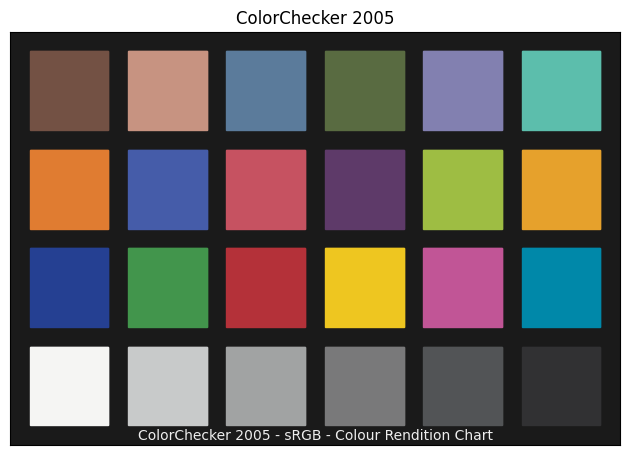

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'ColorChecker 2005'}>)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colour
import colour.plotting as cp 
cp.plot_single_colour_checker("ColorChecker 2005", text_kwargs={"visible": False} )

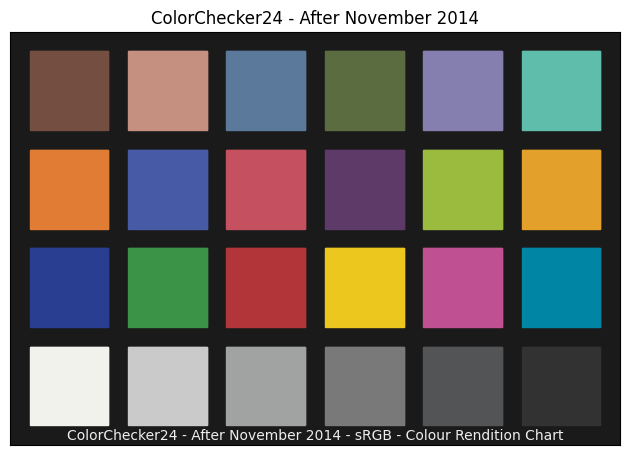

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'ColorChecker24 - After November 2014'}>)

In [3]:
cp.plot_single_colour_checker("ColorChecker24 - After November 2014", text_kwargs={"visible": False} )

The raw data for these plots comes from data [inside the module](https://github.com/colour-science/colour/blob/80a8f21b9c63b5d8e1223df75171abd36ee8a620/colour/characterisation/datasets/colour_checkers/chromaticity_coordinates.py) for example.
The chromaticity coordinates are in *CIE xyY* colourspace.

In [4]:
cc = colour.characterisation.datasets.colour_checkers.CCS_COLOURCHECKERS
cc["ColorChecker 1976"]

ColourChecker(name='ColorChecker 1976', data={'dark skin': array([ 0.4002,  0.3504,  0.1005]), 'light skin': array([ 0.3773,  0.3446,  0.3582]), 'blue sky': array([ 0.247 ,  0.2514,  0.1933]), 'foliage': array([ 0.3372,  0.422 ,  0.1329]), 'blue flower': array([ 0.2651,  0.24  ,  0.2427]), 'bluish green': array([ 0.2608,  0.343 ,  0.4306]), 'orange': array([ 0.506 ,  0.407 ,  0.3005]), 'purplish blue': array([ 0.211,  0.175,  0.12 ]), 'moderate red': array([ 0.4533,  0.3058,  0.1977]), 'purple': array([ 0.2845,  0.202 ,  0.0656]), 'yellow green': array([ 0.38  ,  0.4887,  0.4429]), 'orange yellow': array([ 0.4729,  0.4375,  0.4306]), 'blue': array([ 0.1866,  0.1285,  0.0611]), 'green': array([ 0.3046,  0.4782,  0.2339]), 'red': array([ 0.5385,  0.3129,  0.12  ]), 'yellow': array([ 0.448 ,  0.4703,  0.591 ]), 'magenta': array([ 0.3635,  0.2325,  0.1977]), 'cyan': array([ 0.1958,  0.2519,  0.1977]), 'white 9.5 (.05 D)': array([ 0.3101,  0.3163,  0.9001]), 'neutral 8 (.23 D)': array([ 0.3

I have a a data colour checker which has a slightly different arrangement and 
I am trying to work out the colours and a ca 2005 Greta Macbeth mini color checker which has a calibration sheet which 
follows the original paper.


In [5]:
colour_versions = [k for k in colour.characterisation.datasets.colour_checkers.CCS_COLOURCHECKERS.keys()]
print(f"There are {len(colour_versions)} colour versions")
colour_versions

There are 9 colour versions


['ColorChecker 1976',
 'ColorChecker 2005',
 'BabelColor Average',
 'ColorChecker24 - Before November 2014',
 'ColorChecker24 - After November 2014',
 'babel_average',
 'cc2005',
 'ccb2014',
 'cca2014']

Each version has a name, data and an illuminant.  Looking at the source code you can see that:
some of them have the classic colour names SAMPLE_LABELS_COLORCHECKER_CLASSIC and some have variants.

Note the last 4 are just abreviations of the previous 4 so going to remove those.

In [21]:
colour_versions = colour_versions[:-4]

In [22]:
# Show headers are all the same
dfh = [list(cc[cv].data.keys()) for cv in colour_versions]
df = pd.DataFrame(dfh).transpose()
df.head(n=25)
# prove it
for i,name in enumerate(colour_versions):
    if i > 0:
        same = True
        for j, colour in enumerate(dfh[i]):
            if colour != dfh[0][j]:
                same = False
                print(f"For {name} have {colour} and {dfh[0][j]}")
        if same:
            print(f"{name} has same colour names as {colour_versions[0]}")
                             

ColorChecker 2005 has same colour names as ColorChecker 1976
BabelColor Average has same colour names as ColorChecker 1976
ColorChecker24 - Before November 2014 has same colour names as ColorChecker 1976
ColorChecker24 - After November 2014 has same colour names as ColorChecker 1976


## One question is how different are all these.
We are looking at them mapped into sRGB space and I don't know how many are out of the gamut or how much the differences are, but I am going to find out.
